# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_list = []

#Gather the data for City, Latitude, Longitued, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
print("Begin Data Retrieval")
print("--------------------------")
for city in cities:
    try:
        weather_dict = {}
        response = requests.get(query_url + city).json()
        weather_dict['City'] = city.title()
        weather_dict['Lat'] = response['coord']['lat']
        weather_dict['Lon'] = response['coord']['lon']
        weather_dict['Max Temp'] = response['main']['temp_max']
        weather_dict['Humidity'] = response['main']['humidity']
        weather_dict['Cloudiness'] = response['clouds']['all']
        weather_dict['Wind Speed'] = response['wind']['speed']
        weather_dict['Country'] = response['sys']['country']
        weather_dict['Date'] = response['dt']
        weather_list.append(weather_dict)
        print(f"Processing Record {cities.index(city)} of {len(cities)-1} | {round((cities.index(city)/(len(cities)-1))*100)}% Completed | {city}")
    except:
        print("City not found. Skipping...")
print("--------------------------")
print("Enf of Data Retrieval")

today = date.today()
today = today.strftime("%m/%d/%y")

Begin Data Retrieval
--------------------------
City not found. Skipping...
Processing Record 1 of 599 | 0% Completed | punta arenas
Processing Record 2 of 599 | 0% Completed | mataura
Processing Record 3 of 599 | 1% Completed | ossora
Processing Record 4 of 599 | 1% Completed | ushuaia
Processing Record 5 of 599 | 1% Completed | hilo
Processing Record 6 of 599 | 1% Completed | hellvik
Processing Record 7 of 599 | 1% Completed | oranjemund
City not found. Skipping...
Processing Record 9 of 599 | 2% Completed | poum
Processing Record 10 of 599 | 2% Completed | puerto ayora
City not found. Skipping...
Processing Record 12 of 599 | 2% Completed | kapaa
Processing Record 13 of 599 | 2% Completed | sakaiminato
Processing Record 14 of 599 | 2% Completed | tessalit
Processing Record 15 of 599 | 3% Completed | saint-philippe
Processing Record 16 of 599 | 3% Completed | kruisfontein
Processing Record 17 of 599 | 3% Completed | amethi
Processing Record 18 of 599 | 3% Completed | horsham
Processi

Processing Record 150 of 599 | 25% Completed | tasiilaq
Processing Record 151 of 599 | 25% Completed | lorengau
City not found. Skipping...
Processing Record 153 of 599 | 26% Completed | haines junction
Processing Record 154 of 599 | 26% Completed | gizo
Processing Record 155 of 599 | 26% Completed | ukiah
Processing Record 156 of 599 | 26% Completed | jumla
Processing Record 157 of 599 | 26% Completed | kalianget
Processing Record 158 of 599 | 26% Completed | ca mau
Processing Record 159 of 599 | 27% Completed | avarua
Processing Record 160 of 599 | 27% Completed | pevek
Processing Record 161 of 599 | 27% Completed | pisco
City not found. Skipping...
Processing Record 163 of 599 | 27% Completed | tautira
Processing Record 164 of 599 | 27% Completed | hit
Processing Record 165 of 599 | 28% Completed | khatanga
Processing Record 166 of 599 | 28% Completed | thaba-tseka
Processing Record 167 of 599 | 28% Completed | mujiayingzi
Processing Record 168 of 599 | 28% Completed | nioro
Process

Processing Record 304 of 599 | 51% Completed | kaltenkirchen
Processing Record 305 of 599 | 51% Completed | viransehir
Processing Record 306 of 599 | 51% Completed | hvide sande
Processing Record 307 of 599 | 51% Completed | fortuna
Processing Record 308 of 599 | 51% Completed | naze
Processing Record 309 of 599 | 52% Completed | moerai
Processing Record 310 of 599 | 52% Completed | bismarck
Processing Record 311 of 599 | 52% Completed | verkh-usugli
Processing Record 312 of 599 | 52% Completed | alyangula
Processing Record 313 of 599 | 52% Completed | avera
Processing Record 314 of 599 | 52% Completed | aklavik
Processing Record 315 of 599 | 53% Completed | uvira
Processing Record 316 of 599 | 53% Completed | tarata
Processing Record 317 of 599 | 53% Completed | meulaboh
Processing Record 318 of 599 | 53% Completed | road town
City not found. Skipping...
Processing Record 320 of 599 | 53% Completed | quatre cocos
Processing Record 321 of 599 | 54% Completed | codrington
Processing Rec

Processing Record 459 of 599 | 77% Completed | wangou
Processing Record 460 of 599 | 77% Completed | nizhnevartovsk
Processing Record 461 of 599 | 77% Completed | maningrida
Processing Record 462 of 599 | 77% Completed | big rapids
Processing Record 463 of 599 | 77% Completed | ngunguru
Processing Record 464 of 599 | 77% Completed | longyearbyen
Processing Record 465 of 599 | 78% Completed | biltine
Processing Record 466 of 599 | 78% Completed | mitsamiouli
City not found. Skipping...
Processing Record 468 of 599 | 78% Completed | manggar
Processing Record 469 of 599 | 78% Completed | jacqueville
Processing Record 470 of 599 | 78% Completed | port-gentil
City not found. Skipping...
Processing Record 472 of 599 | 79% Completed | saint-pierre
Processing Record 473 of 599 | 79% Completed | labuhan
Processing Record 474 of 599 | 79% Completed | abu zabad
City not found. Skipping...
Processing Record 476 of 599 | 79% Completed | namibe
Processing Record 477 of 599 | 80% Completed | asau
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_list)
weather_df.head(5)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,44.60,57,0,8.05,CL,1614562578
1,Mataura,-46.1927,168.8643,72.00,72,91,1.99,NZ,1614562578
2,Ossora,59.2353,163.0719,-0.26,93,100,14.90,RU,1614562579
3,Ushuaia,-54.8000,-68.3000,44.60,65,20,9.22,AR,1614562579
4,Hilo,19.7297,-155.0900,75.20,69,90,8.05,US,1614562579


In [5]:
weather_df.to_csv(output_data_file,index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.loc[weather_df['Humidity']>100,:]

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
# Not applicable but here is how I would have done it
rows_bye_bye = weather_df.loc[weather_df['Humidity']>100,:].index
rows_bye_bye

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(index=rows_bye_bye,inplace=False)
clean_city_data
print(f'Went from {len(weather_df)} rows to {len(clean_city_data)} i.e. Removed {len(weather_df)-len(clean_city_data)} rows of data')

Went from 551 rows to 551 i.e. Removed 0 rows of data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

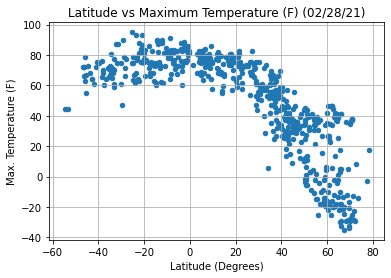

In [9]:
weather_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
plt.savefig("../output_data/fig1.png", facecolor='w')

# Scatter plot shows changes in maximum temperature at different latitudes. As expected the higher in latitude the colder it gets, however, I am surprised to see that the lower in latitude the drop in temperature is not as pronounced.

## Latitude vs. Humidity Plot

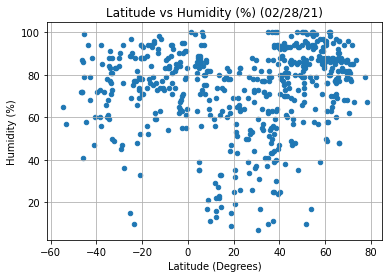

In [10]:
weather_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
plt.savefig("../output_data/fig2.png", facecolor='w')

# Scatter plot shows changes in humidity at different latitudes. It appears to have no significant correlation.

## Latitude vs. Cloudiness Plot

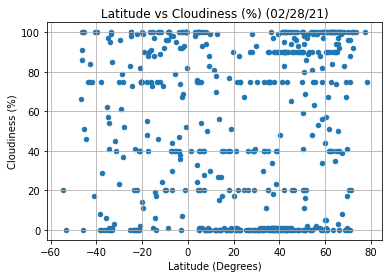

In [11]:
weather_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
plt.savefig("../output_data/fig3.png", facecolor='w')

# Scatter plot shows changes in Cloudiness at different latitudes. It appears to have no significant correlation

## Latitude vs. Wind Speed Plot

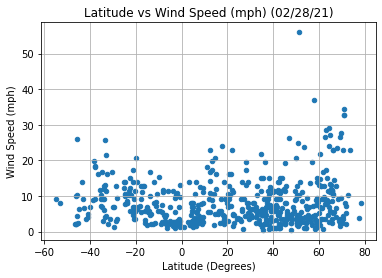

In [12]:
weather_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
plt.savefig("../output_data/fig4.png", facecolor='w')

# Scatter plot shows changes in wind speed at different latitudes. It appears to have no significant correlation.

## Linear Regression

In [13]:
NH_df = weather_df.loc[weather_df['Lat']>0,:]
SH_df = weather_df.loc[weather_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.7


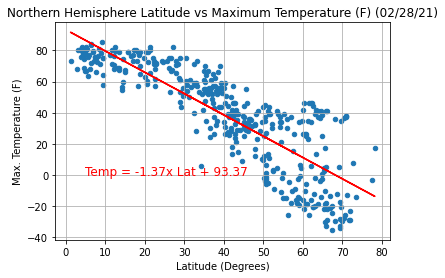

In [14]:
NH_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Northern Hemisphere Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Max Temp"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Max Temp"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Temp = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=12,color="r")
plt.savefig("../output_data/fig5.png", facecolor='w')

# An R-square value indicates a very strong correlation between latitude and maximum temperature in the Northern Hemisphere. Variation is greather for latitudes greather than 50. The correlation is a negative correlation. The higher the latitude the lower the max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.22


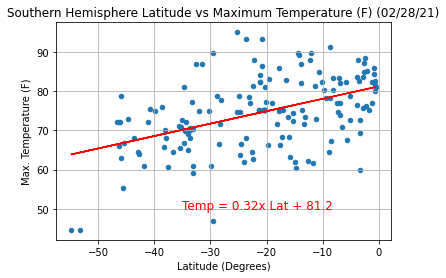

In [15]:
SH_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Southern Hemisphere Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Max Temp"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Max Temp"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Temp = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=12,color="r")
plt.savefig("../output_data/fig6.png", facecolor='w')

# An R-square value indicates a weak correlation between latitude and maximum temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.11


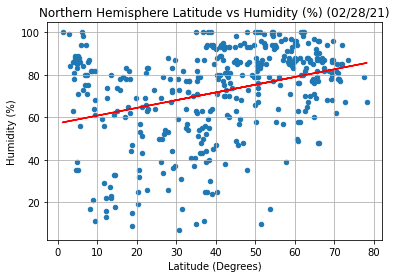

In [16]:
NH_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Northern Hemisphere Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Humidity"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Humidity"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Humidity = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=12,color="r")
plt.savefig("../output_data/fig7.png", facecolor='w')

# The R-square value indicates a weak correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.02


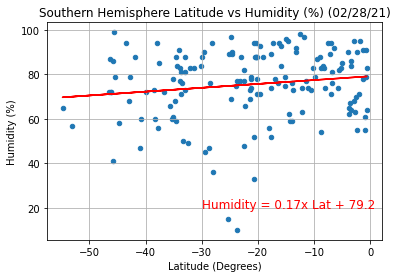

In [17]:
SH_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Southern Hemisphere Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Humidity"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Humidity"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Humidity = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="r")
plt.savefig("../output_data/fig8.png", facecolor='w')

# The R-square value indicates no correlation between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.08


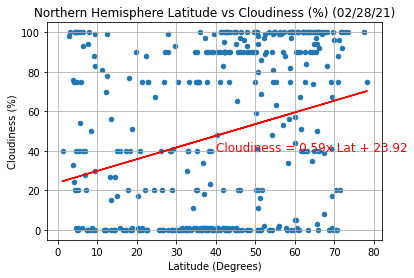

In [18]:
NH_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Northern Hemisphere Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Cloudiness"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Cloudiness"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Cloudiness = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=12,color="r")
plt.savefig("../output_data/fig9.png", facecolor='w')

# The R-square value indicates no correlation between latitude and clodiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.04


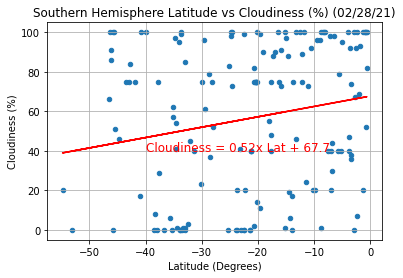

In [19]:
SH_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Southern Hemisphere Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Cloudiness"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Cloudiness"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Cloudiness = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=12,color="r")
plt.savefig("../output_data/fig10.png", facecolor='w')

# The R-square value indicates no correlation between latitude and clodiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.03


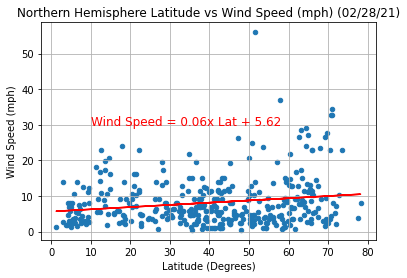

In [20]:
NH_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Northern Hemisphere Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Wind Speed"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Wind Speed"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Wind Speed = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="r")
plt.savefig("../output_data/fig11.png", facecolor='w')

# The R-square value indicates no correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.09


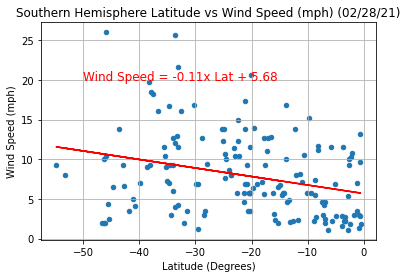

In [21]:
SH_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Southern Hemisphere Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Wind Speed"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Wind Speed"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Wind Speed = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="r")
plt.savefig("../output_data/fig12.png", facecolor='w')

# The R-square value indicates no correlation between latitude and wind speed in the Southern Hemisphere.